Reading file from drive, and unzipping.

In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv.zip
  inflating: IMDB Dataset.csv        


In [2]:
import pandas as pd

Reading Data

In [354]:
df = pd.read_csv('IMDB Dataset.csv')

In [272]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


We have total 50k reviews

In [273]:
df.shape

(50000, 2)

No null-values present in the data

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


25k reviews for each sentiment

In [275]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

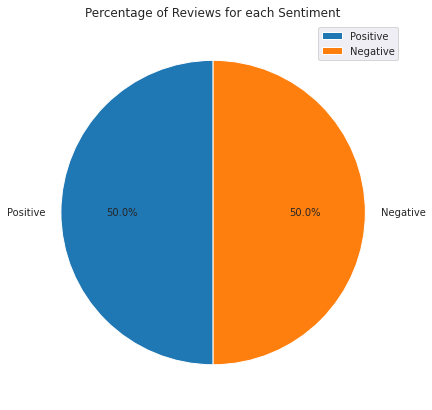

In [289]:
plt.figure(figsize = (7,7))
data = df.sentiment.value_counts()
plt.pie(data, autopct='%.1f%%', startangle=90, labels=['Positive','Negative'])
plt.legend()
plt.title("Percentage of Reviews for each Sentiment")
plt.show()

In [355]:
df.sentiment = df.sentiment.apply(lambda x: 0 if x=='negative' else 1)

In [291]:
df.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

Sample Review

In [292]:
df.sample().review.values

array(['I have seen the trailer for this movie several times over, and I have to say that Ned Kelly looks like it is going to be a wonderful film. When I saw the trailer for the first time, I could not take my eyes away from it (it got my attention for sure). Heath Ledger sticks to what he knows and what works for him, period pieces. Not to mention Orlando Bloom ,who is seen for a split second looks fantastic. I think that this movie will be a hit, and will be seen over and over again my many people.'],
      dtype=object)

Length of reviews and its distribution

In [294]:
lengths = [len(review) for review in df.review]

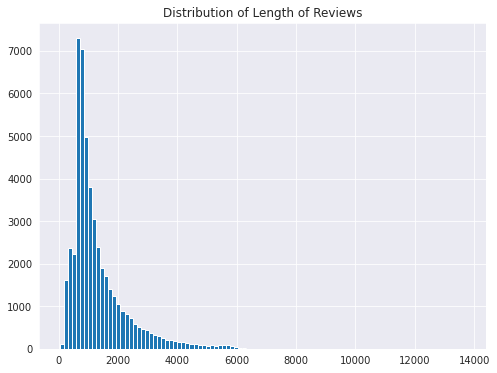

In [443]:
plt.figure(figsize = (8,6))
plt.title("Distribution of Length of Reviews")
plt.hist(lengths, bins=100)
plt.show()

WordCloud of reviews

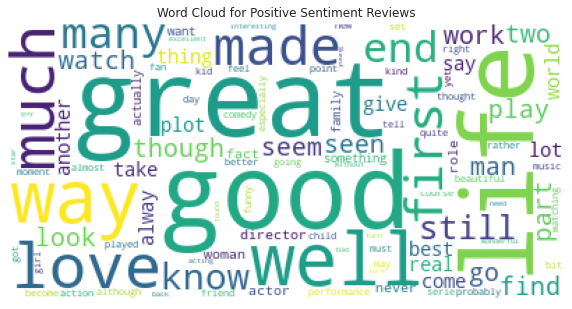

In [240]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(['film','character','movie','story','one','show','really','even','people','think','scene','time','little','see','make'])
wordcloud = WordCloud(max_words = 100, stopwords=stopwords, background_color='white')
text = ' '.join(df.cleaned_text[df.sentiment==1].tolist())
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Reviews')
plt.imshow(wordcloud.generate(text))
plt.show()

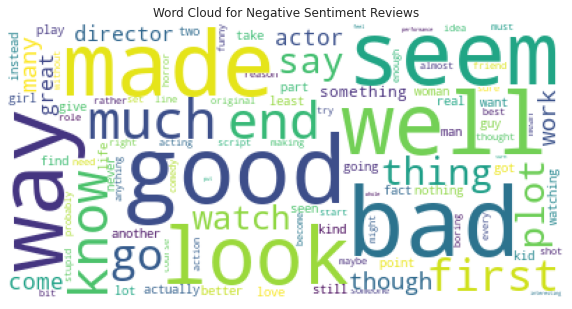

In [241]:
text = ' '.join(df.cleaned_text[df.sentiment==0].tolist())
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Reviews')
plt.imshow(wordcloud.generate(text))
plt.show()

##Text Pre-Processing

In [5]:
!pip install contractions

     |████████████████████████████████| 284 kB 8.5 MB/s 
     |████████████████████████████████| 321 kB 57.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85439 sha256=3169028af01de41ddbdf850d594630cc8c8977dd580291baa594812db59a21f5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


Importing necessary libraries for pre-processing

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [253]:
text = df.review[0]
text

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Lowercasing

In [254]:
text = text.lower().replace('\\','')
text

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

Removing HTML Tags and URLs

In [255]:
text = re.sub(r'http\S+|www\S+|<.*?>', ' ', text)
text

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other sh

Tokenizing

In [256]:
text = word_tokenize(text)
print(text)

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', "'ll", 'be', 'hooked', '.', 'they', 'are', 'right', ',', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', '.', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', '.', 'trust', 'me', ',', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', ',', 'sex', 'or', 'violence', '.', 'its', 'is', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', '.', 'it', 'is', 'called', 'oz', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'it', 'focuses', 'mainly', 'on', 'emerald', 'city', ',', 'an', 'experimental

Lemmatizing and removing tokens other than alphabets, also removing stopwords.

In [257]:
text = [lemmatizer.lemmatize(t) for t in text if t.isalpha() and t not in stop_words]
print(text)

['one', 'reviewer', 'mentioned', 'watching', 'oz', 'episode', 'hooked', 'right', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'would', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'oz', 'mess', 'ar

Converting tokens back to text.

In [258]:
text = ' '.join(text)
text

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz 

Combining all the above steps into a single function.

In [7]:
def clean_text(text):
  text = text.lower().replace('\\','')
  text = contractions.fix(text)
  text = re.sub(r'http\S+|www\S+|<.*?>', ' ', text)
  text = word_tokenize(text)
  text = [lemmatizer.lemmatize(t) for t in text if t.isalpha() and t not in stop_words]
  text = ' '.join(text)
  return text

In [356]:
df['cleaned_text'] = df['review'].apply(clean_text)

## Aspect Extraction

Correlation Explanation (CorEx) is a topic model that yields rich topics that are maximally informative about a set of documents.
Documentation: https://github.com/gregversteeg/corex_topic

In [11]:
!pip install corextopic

Vectorizing the text data.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [323]:
count_vectorizer = CountVectorizer(ngram_range = (1,2), min_df =10)

In [324]:
vectorizer = count_vectorizer.fit(df['cleaned_text'])
countvec = count_vectorizer.transform(df['cleaned_text'])
vocab = count_vectorizer.get_feature_names()

In [306]:
len(vocab)

77676

In [313]:
from corextopic import corextopic as ct

In [15]:
anchors = []
model = ct.Corex(n_hidden=8, seed=42)
model = model.fit(
    countvec,
    words=vocab
)

Keywords for each topic:

In [16]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: scene, film, take, seems, director, work, point, end, another, set
Topic #2: world, war, many, audience, american, human, may, viewer, perhaps, event
Topic #3: role, performance, cast, play, john, supporting, played, robert, best, actor
Topic #4: would, like, even, could, thing, say, think, something, people, make
Topic #5: man, kill, police, murder, death, killed, find, dead, men, help
Topic #6: first, one, show, time, get, also, character, much, way, well
Topic #7: life, young, two, woman, father, year, family, love, mother, new
Topic #8: bad, horror, worst, acting, effect, gore, budget, horror movie, awful, terrible


Weight of each keyword in a topic:

In [21]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    print(i, topic_ngrams)

0 [('scene', 0.056937180401703764, 1.0), ('film', 0.05558667604394902, 1.0), ('take', 0.04308737778088196, 1.0), ('seems', 0.04224236813247829, 1.0), ('director', 0.03743408675696986, 1.0), ('work', 0.03701013332767495, 1.0), ('point', 0.03698846697565961, 1.0), ('end', 0.03467904142177642, 1.0), ('another', 0.03275488091878193, 1.0), ('set', 0.0324440238472365, 1.0)]
1 [('world', 0.04487269148466589, 1.0), ('war', 0.033334915802109226, 1.0), ('many', 0.03034084906908092, 1.0), ('audience', 0.0270475390226811, 1.0), ('american', 0.024826288985606137, 1.0), ('human', 0.023559628811837773, 1.0), ('may', 0.02051057854380973, 1.0), ('viewer', 0.01958762980932009, 1.0), ('perhaps', 0.01925804043382227, 1.0), ('event', 0.019078180011287162, 1.0)]
2 [('role', 0.08328504604203059, 1.0), ('performance', 0.06977741370779576, 1.0), ('cast', 0.04646447098661361, 1.0), ('play', 0.04619352902444802, 1.0), ('john', 0.033162353738660756, 1.0), ('supporting', 0.031197060075239907, 1.0), ('played', 0.02

Using the below terms as anchors for aspects extraction.

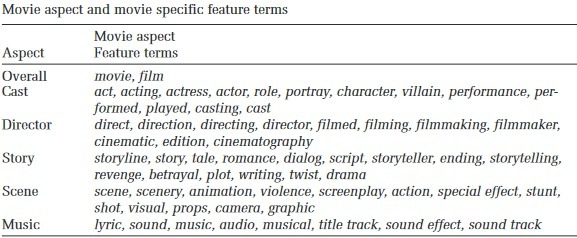

In [314]:
anchors = [
['movie', 'film', 'picture', 'motion picture', 'feature film', 'flick', 'horror movie', 'romantic movie', 'comedy movie', 'romantic comedy', 'action film', 'drama movie', 'thriller', 'fiction', 'science fiction', 'scifi', 'documentary', 'show', 'tv show', 'episode', 'season', 'series'],
           
['act', 'acting', 'actress', 'actor', 'role', 'portray', 'character', 'villain', 'performance', 'performed', 'played', 'casting', 'cast'],

['direct', 'direction', 'directing', 'director', 'filmed', 'filming', 'filmmaking', 'filmmaker', 'cinematic', 'edition', 'cinematography'],

['storyline', 'story', 'tale', 'romance', 'dialog', 'script', 'storyteller', 'ending', 'storytelling', 'revenge', 'betrayal', 'plot', 'writing', 'twist', 'drama'],

['scene', 'scenery', 'animation', 'violence', 'screenplay', 'action', 'special effect', 'stunt', 'shot', 'visual', 'prop', 'camera', 'graphic'],

['lyric', 'sound', 'music', 'audio', 'musical', 'title track', 'sound effect', 'sound track']]

Checking if anchors are in vocabulary

In [315]:
anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

In [316]:
print(anchors)

[['movie', 'film', 'picture', 'motion picture', 'feature film', 'flick', 'horror movie', 'romantic movie', 'comedy movie', 'romantic comedy', 'action film', 'drama movie', 'thriller', 'fiction', 'science fiction', 'scifi', 'documentary', 'show', 'tv show', 'episode', 'season', 'series'], ['act', 'acting', 'actress', 'actor', 'role', 'portray', 'character', 'villain', 'performance', 'performed', 'played', 'casting', 'cast'], ['direct', 'direction', 'directing', 'director', 'filmed', 'filming', 'filmmaking', 'filmmaker', 'cinematic', 'edition', 'cinematography'], ['storyline', 'story', 'tale', 'romance', 'dialog', 'script', 'storyteller', 'ending', 'storytelling', 'revenge', 'betrayal', 'plot', 'writing', 'twist', 'drama'], ['scene', 'scenery', 'animation', 'violence', 'screenplay', 'action', 'special effect', 'stunt', 'shot', 'visual', 'prop', 'camera', 'graphic'], ['lyric', 'sound', 'music', 'audio', 'musical', 'title track', 'sound effect', 'sound track']]


In [317]:
model = ct.Corex(n_hidden=6, seed=42)
model = model.fit(
    countvec,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength=3 # Tell the model how much it should rely on the anchors
)

In [318]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: movie, show, like, would, even, bad, thing, could, really, episode
Topic #2: role, performance, cast, played, actor, character, actress, play, supporting, casting
Topic #3: director, life, filmmaker, cinematography, world, work, cinematic, audience, war, yet
Topic #4: story, plot, ending, script, much, twist, make, way, end, point
Topic #5: scene, shot, action, special effect, camera, horror, violence, effect, kill, gore
Topic #6: one, two, sound, music, also, man, take, year, musical, later


In [319]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    print(i, topic_ngrams)

0 [('movie', 0.11055617449395314, 1.0), ('show', 0.09970731244092132, 1.0), ('like', 0.07085805310807043, 1.0), ('would', 0.06346896596290515, 1.0), ('even', 0.05726450279120943, 1.0), ('bad', 0.055482452662041, 1.0), ('thing', 0.04938722658492518, 1.0), ('could', 0.04931835256649509, 1.0), ('really', 0.0480624545452269, 1.0), ('episode', 0.04721294275114003, 1.0)]
1 [('role', 0.4536472473793677, 1.0), ('performance', 0.33509653887854723, 1.0), ('cast', 0.21391434320798464, 1.0), ('played', 0.14747835339205798, 1.0), ('actor', 0.14317024165860034, 1.0), ('character', 0.1048495776102015, 1.0), ('actress', 0.08082438100405707, 1.0), ('play', 0.04956203999725809, 1.0), ('supporting', 0.035106066736119594, 1.0), ('casting', 0.03023403969206499, 1.0)]
2 [('director', 0.12727215168248948, 1.0), ('life', 0.042536506324488306, 1.0), ('filmmaker', 0.0404636833285473, 1.0), ('cinematography', 0.03791227807536422, 1.0), ('world', 0.03704910597537848, 1.0), ('work', 0.032831102830333254, 1.0), ('c

Transforming the review data.

In [467]:
topic_df = pd.DataFrame(
    model.transform(countvec), 
    columns=['Aspect1-Overall', 'Aspect2-Cast', 'Aspect3-Director', 'Aspect4-Story', 'Aspect5-Scene', 'Aspect6-Music']
)
topic_df.index = df.index

In [468]:
topic_df.head()

,Aspect1-Overall,Aspect2-Cast,Aspect3-Director,Aspect4-Story,Aspect5-Scene,Aspect6-Music
0,True,False,True,False,True,False
1,False,True,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,True,True,True,False,False


Converting boolean to 0 and 1

In [329]:
for i in range(len(topic_df.columns)):
  topic_df.iloc[:,i] = topic_df.iloc[:,i].apply(lambda x:1 if x else 0)

In [330]:
topic_df.head()

,Aspect1-Overall,Aspect2-Cast,Aspect3-Director,Aspect4-Story,Aspect5-Scene,Aspect6-Music
0,1,0,1,0,1,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,1,1,0,0


Adding these apects to the dataframe.

In [357]:
df = pd.concat([df, topic_df], axis=1)

In [363]:
aspect_per_review = topic_df.sum(axis=1)

In [364]:
aspect_per_review = aspect_per_review.value_counts()
aspect_per_review

1    15037
0    12763
2     8071
3     4881
4     3689
5     3171
6     2388
dtype: int64

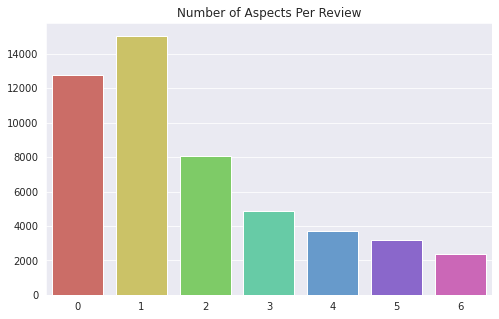

In [372]:
plt.figure(figsize=(8,5))
plt.title('Number of Aspects Per Review')
sns.set_style('darkgrid')
sns.barplot(x=aspect_per_review.index, y=aspect_per_review.values, palette='hls')
plt.show()

In [373]:
reviews_per_aspect = topic_df.sum(axis=0)

In [374]:
reviews_per_aspect

Aspect1-Overall     19284
Aspect2-Cast        16120
Aspect3-Director    13277
Aspect4-Story       14776
Aspect5-Scene       14403
Aspect6-Music       12901
dtype: int64

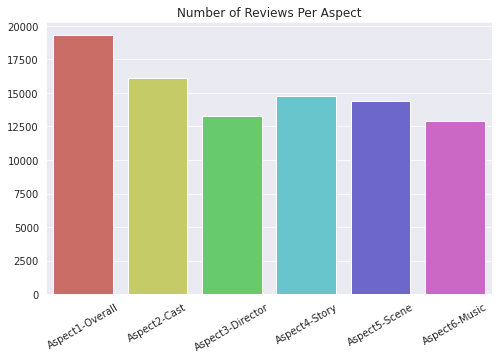

In [378]:
plt.figure(figsize=(8,5))
plt.title('Number of Reviews Per Aspect')
sns.set_style('darkgrid')
sns.barplot(x=reviews_per_aspect.index, y=reviews_per_aspect.values, palette='hls')
plt.xticks(rotation=30)
plt.show()

## Lexicon Based Sentiment Analysis

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

Documentation: https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader

In [60]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 6.8 MB/s 


In [63]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [379]:
df['scores'] = df['cleaned_text'].apply(lambda review: SIA.polarity_scores(review)['compound'])

In [380]:
df['scores'] = df['scores'].apply(lambda x: (x+1)/2)

In [381]:
df['vader_sent'] = df['scores'].apply(lambda x: 0 if x<0.5 else 1)

Accuracy Received from Lexical Approach

In [382]:
lex_acc = sum(df['vader_sent']==df['sentiment'])/df.shape[0]*100
print("Accuracy:{}".format(lex_acc))

Accuracy:67.29


In [383]:
df

,review,sentiment,cleaned_text,Aspect1-Overall,Aspect2-Cast,Aspect3-Director,Aspect4-Story,Aspect5-Scene,Aspect6-Music,scores,vader_sent
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode hoo...,1,0,1,0,1,0,0.00395,0
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...,0,1,0,0,0,0,0.97720,1
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...,0,0,0,0,0,0,0.98020,1
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...,0,0,0,0,0,0,0.04695,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...,0,1,1,1,0,0,0.99435,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job creative original...,1,0,0,0,0,0,0.99355,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...,0,0,0,0,0,0,0.07225,0
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary school nu...,0,0,1,0,0,0,0.07920,0
49998,I'm going to have to disagree with the previou...,0,I going disagree previous comment side maltin ...,0,1,1,1,1,0,0.17015,0


## Hybrid Sentiment Analysis

Importing various Classifier Models

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [206]:
classifiers = [('Logistic Regression', LogisticRegression()),
               ('SGD', SGDClassifier()),
               ('Naive Bayes', MultinomialNB()),
               ('SVM', LinearSVC()),
               ('Random Forest', RandomForestClassifier()),
               ('XGBoost', XGBClassifier())
              ]

Using Column Transformer for transforming the column 'cleaned_text', and pass the other columns as it is.

In [384]:
from sklearn.compose import ColumnTransformer

Using TFIDF Vectorizer as part of the pipeline

In [400]:
column_transformer = ColumnTransformer(
    [('tfidf', TfidfVectorizer(), 'cleaned_text')],
    remainder='passthrough')

Driver functiion for training and evaluating

In [401]:
def train_and_evaluate(X_train, X_test, y_train, y_test, clf):
  # Training Pipeline
  pipeline = Pipeline([
                     ('tfidf', column_transformer),
                     ('model', clf)
                     ])
  # Fitting the model on training set
  pipeline.fit(X_train, y_train)
  # Predicting target for test set
  y_pred = pipeline.predict(X_test)
  # Calculating accuracy
  acc = accuracy_score(y_test, y_pred)
  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  # Plotting Heatmap
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.show()
  return acc

Using the cleaned text, sentiment scores, and the sentiment labels(1/0) as the features for training. (For HYBRID Approach)

In [402]:
X = df[['cleaned_text','scores','vader_sent']]
y= df['sentiment']

In [403]:
X.head()

,cleaned_text,scores,vader_sent
0,one reviewer mentioned watching oz episode hoo...,0.00395,0
1,wonderful little production filming technique ...,0.97720,1
2,thought wonderful way spend time hot summer we...,0.98020,1
3,basically family little boy jake think zombie ...,0.04695,0
4,petter mattei love time money visually stunnin...,0.99435,1


Splitting data into train and test data. Setting test-size as 30% of the data.

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training the model for different classifiers, and plotting the confusion matrix for each of them.




 Logistic Regression 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


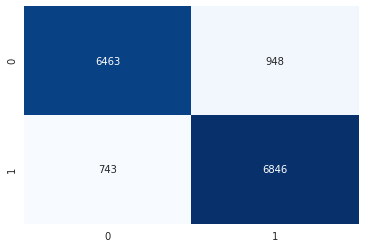




 SGD 



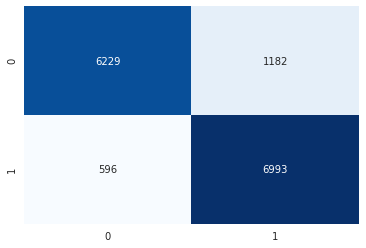




 Naive Bayes 



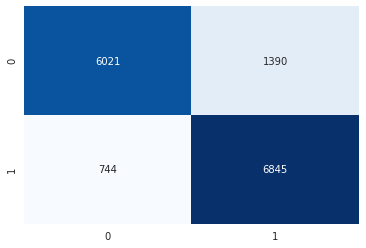




 SVM 



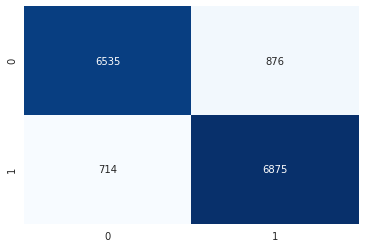




 Random Forest 



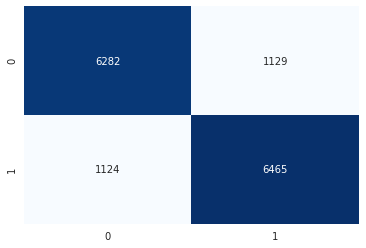




 XGBoost 



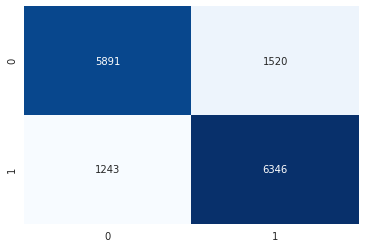

In [405]:
scores = []
for clf in classifiers:
  print('\n\n\n', clf[0], '\n')
  acc = train_and_evaluate(X_train, X_test, y_train, y_test, clf[1])
  scores.append(acc)

Visualizing the accuracy scores for each classifier.

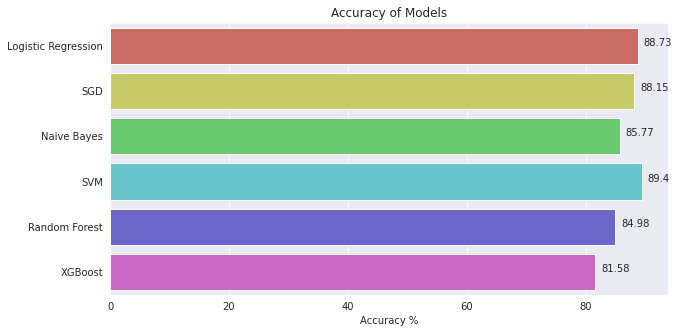

In [406]:
Models = [c[0] for c in classifiers]
Accuracy = [s*100 for s in scores]
data = pd.DataFrame({'Models':Models, 'Accuracy':Accuracy})

plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x=Accuracy, y=Models, data=data, palette='hls')
for index, value in enumerate(Accuracy):
    value = round(value,2)
    plt.text(value+1, index, str(value))

plt.xlabel('Accuracy %')
plt.title('Accuracy of Models')
plt.show()

As LinearSVC gives the best result, using this as our model for predictions.

In [424]:
pipeline = Pipeline([
                     ('tfidf', column_transformer),
                     ('model', LinearSVC())
                     ])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_pred,y_test)*100)

89.4


Using Randomized Search CV for choosing best hyperparameter 'C' (regularization parameter)

In [423]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"model__C": [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,5.0,10.0]}
rnd_search_cv = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] model__C=0.5 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... model__C=0.5, total=   4.3s
[CV] model__C=0.5 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ..................................... model__C=0.5, total=   4.4s
[CV] model__C=0.5 ....................................................
[CV] ..................................... model__C=0.5, total=   4.3s
[CV] model__C=0.7 ....................................................
[CV] ..................................... model__C=0.7, total=   4.3s
[CV] model__C=0.7 ....................................................
[CV] ..................................... model__C=0.7, total=   4.4s
[CV] model__C=0.7 ....................................................
[CV] ..................................... model__C=0.7, total=   4.3s
[CV] model__C=10.0 ...................................................
[CV] .................................... model__C=10.0, total=   6.8s
[CV] model__C=10.0 ...................................................
[CV] .................................... model__C=10.0, total=   6.5s
[CV] model__C=10.0 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('tfidf',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('tfidf',
                                                                               TfidfVectorizer(analyzer='word',
                                                                                               binary=False,
                                                                                               decode_error='strict',
                                                                                   

Best Parameters:

In [426]:
clf = rnd_search_cv.best_estimator_
clf

Pipeline(memory=None,
         steps=[('tfidf',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.float64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
                          

Using the model with the optimized parameter

In [427]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test)*100)

89.64666666666666


Saving the model

In [430]:
import pickle
pickle.dump(clf,open(b"model","wb"))

Creating a driver function for predicting new values

In [456]:
def ABSA(text):
  df = pd.DataFrame(text, columns=['review'])
  df['cleaned_text'] = df['review'].apply(clean_text)

  countvec = count_vectorizer.transform(df['cleaned_text'])

  topic_df = pd.DataFrame(
    model.transform(countvec), 
    columns=['Aspect1-Overall', 'Aspect2-Cast', 'Aspect3-Director', 'Aspect4-Story', 'Aspect5-Scene', 'Aspect6-Music']
    )
  topic_df.index = df.index
  for i in range(len(topic_df.columns)):
    topic_df.iloc[:,i] = topic_df.iloc[:,i].apply(lambda x:1 if x else 0)
  df = pd.concat([df, topic_df], axis=1)

  df['scores'] = df['cleaned_text'].apply(lambda review: SIA.polarity_scores(review)['compound'])
  df['scores'] = df['scores'].apply(lambda x: (x+1)/2)
  df['vader_sent'] = df['scores'].apply(lambda x: 0 if x<0.5 else 1)

  input = df[['cleaned_text','scores','vader_sent']]
  y_pred = clf.predict(input)
  df['predicted_sentiment'] = y_pred

  return df

Using sample data to predict

In [457]:
test = ABSA(df.sample(5).review.values)
test.head()

,review,cleaned_text,Aspect1-Overall,Aspect2-Cast,Aspect3-Director,Aspect4-Story,Aspect5-Scene,Aspect6-Music,scores,vader_sent,predicted_sentiment
0,I'll start with what I liked.<br /><br />I rea...,I start liked really liked song everything gre...,0,0,0,0,0,0,0.98230,1,0
1,Stanley Kramer directs an action thriller and ...,stanley kramer directs action thriller leaf tw...,0,1,0,1,1,0,0.26185,0,0
2,the only thing that frequently pops into my he...,thing frequently pop head I writing review I n...,1,0,0,0,0,0,0.95840,1,0
3,"This is not a film is a clever, witty and ofte...",film clever witty often heart touching movie r...,0,1,0,1,0,0,0.99025,1,1
4,Rowan Atkinson's Mr. Bean ranks right up there...,rowan atkinson bean rank right laurel hardy bu...,1,0,0,0,0,1,0.98895,1,1


Printing results of prediction

In [466]:
for i in range(len(test)):
  print('Review:\n')
  print(test.loc[i,'review'])
  print('\nAspects:')
  for column in test.columns:
    if column.startswith('Aspect') and test.loc[i,column]:
      print(column)
  print('\nPolarity:', test.loc[i,'predicted_sentiment'])
  print('\n\n')

Review:

I'll start with what I liked.<br /><br />I really liked the songs, everything about them was great, the costumes, music, lyrics (as long as the translation was good :) ), choreography, everything.<br /><br />I loved the crab scene and the cooking scene.<br /><br />But that's about it.<br /><br />I get it, arty cinema, blablabla, but too much is too much. Too much silence (it was interesting for an hour, but two hours of hearing steps and moaning from time to time, really...), too much boredom (no movie should ever be boring, no matter how deep it was to be!), too much porn-like scenes (I do get it really, I get that they were filming a porn movie there, but really, REALLY, really that is too much) I truly think, that cinema should be for watching and this one is definitely not watchable in no way.<br /><br />3 stars for the songs.

Aspects:

Polarity: 0



Review:

Stanley Kramer directs an action thriller and leaves out two key things: action and thrills. THE DOMINO PRINCIPLE